In [63]:
import pandas as pd
import numpy as np
# Loading the dataset
df = pd.read_csv('Life_Expectancy_Data.csv')

# Cleaning column names by stripping whitespace
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")

print("Initial Data Overview")
print("\nFirst 5 rows of the dataset:")
df.head()



Initial Data Overview

First 5 rows of the dataset:


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [64]:
print("\nDescriptive Statistics for Numerical Columns (Before Cleaning):")
print(df.describe())


Descriptive Statistics for Numerical Columns (Before Cleaning):
              Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  1649.000000      1649.000000      1649.000000    1649.000000   
mean   2007.840509        69.302304       168.215282      32.553062   
std       4.087711         8.796834       125.310417     120.847190   
min    2000.000000        44.000000         1.000000       0.000000   
25%    2005.000000        64.400000        77.000000       1.000000   
50%    2008.000000        71.700000       148.000000       3.000000   
75%    2011.000000        75.000000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1600.000000   

           Alcohol  percentage_expenditure  Hepatitis_B        Measles  \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   

In [65]:
print("\nDataFrame Info:")
print(df.info())

# Identifing missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("\nMissing Values Count and Percentage for each feature:")
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

# Storing initial descriptive statistics for comparison later
initial_describe = df.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_Mortality                  1649 non-null   int64  
 5   infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under_five_deaths                1649 non-null   int64  
 12  Pol

In [66]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1_19_years               0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [67]:
print(f"Duplicate Rows:\n{df.duplicated()}")

Duplicate Rows:
0       False
1       False
2       False
3       False
4       False
        ...  
1644    False
1645    False
1646    False
1647    False
1648    False
Length: 1649, dtype: bool


In [68]:
#Saving the cleaned data to a new csv file
df.to_csv("cleaned_life_expectancy_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_life_expectancy_data.csv'")


Cleaned data saved to 'cleaned_life_expectancy_data.csv'


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset again to ensure a fresh start
new_data_set = pd.read_csv('cleaned_Life_Expectancy_data.csv')
print(new_data_set.head())



# Verifing cleaned column names
print("Cleaned Column Names after robust cleaning:")
print(new_data_set.columns.tolist())


       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0      6             

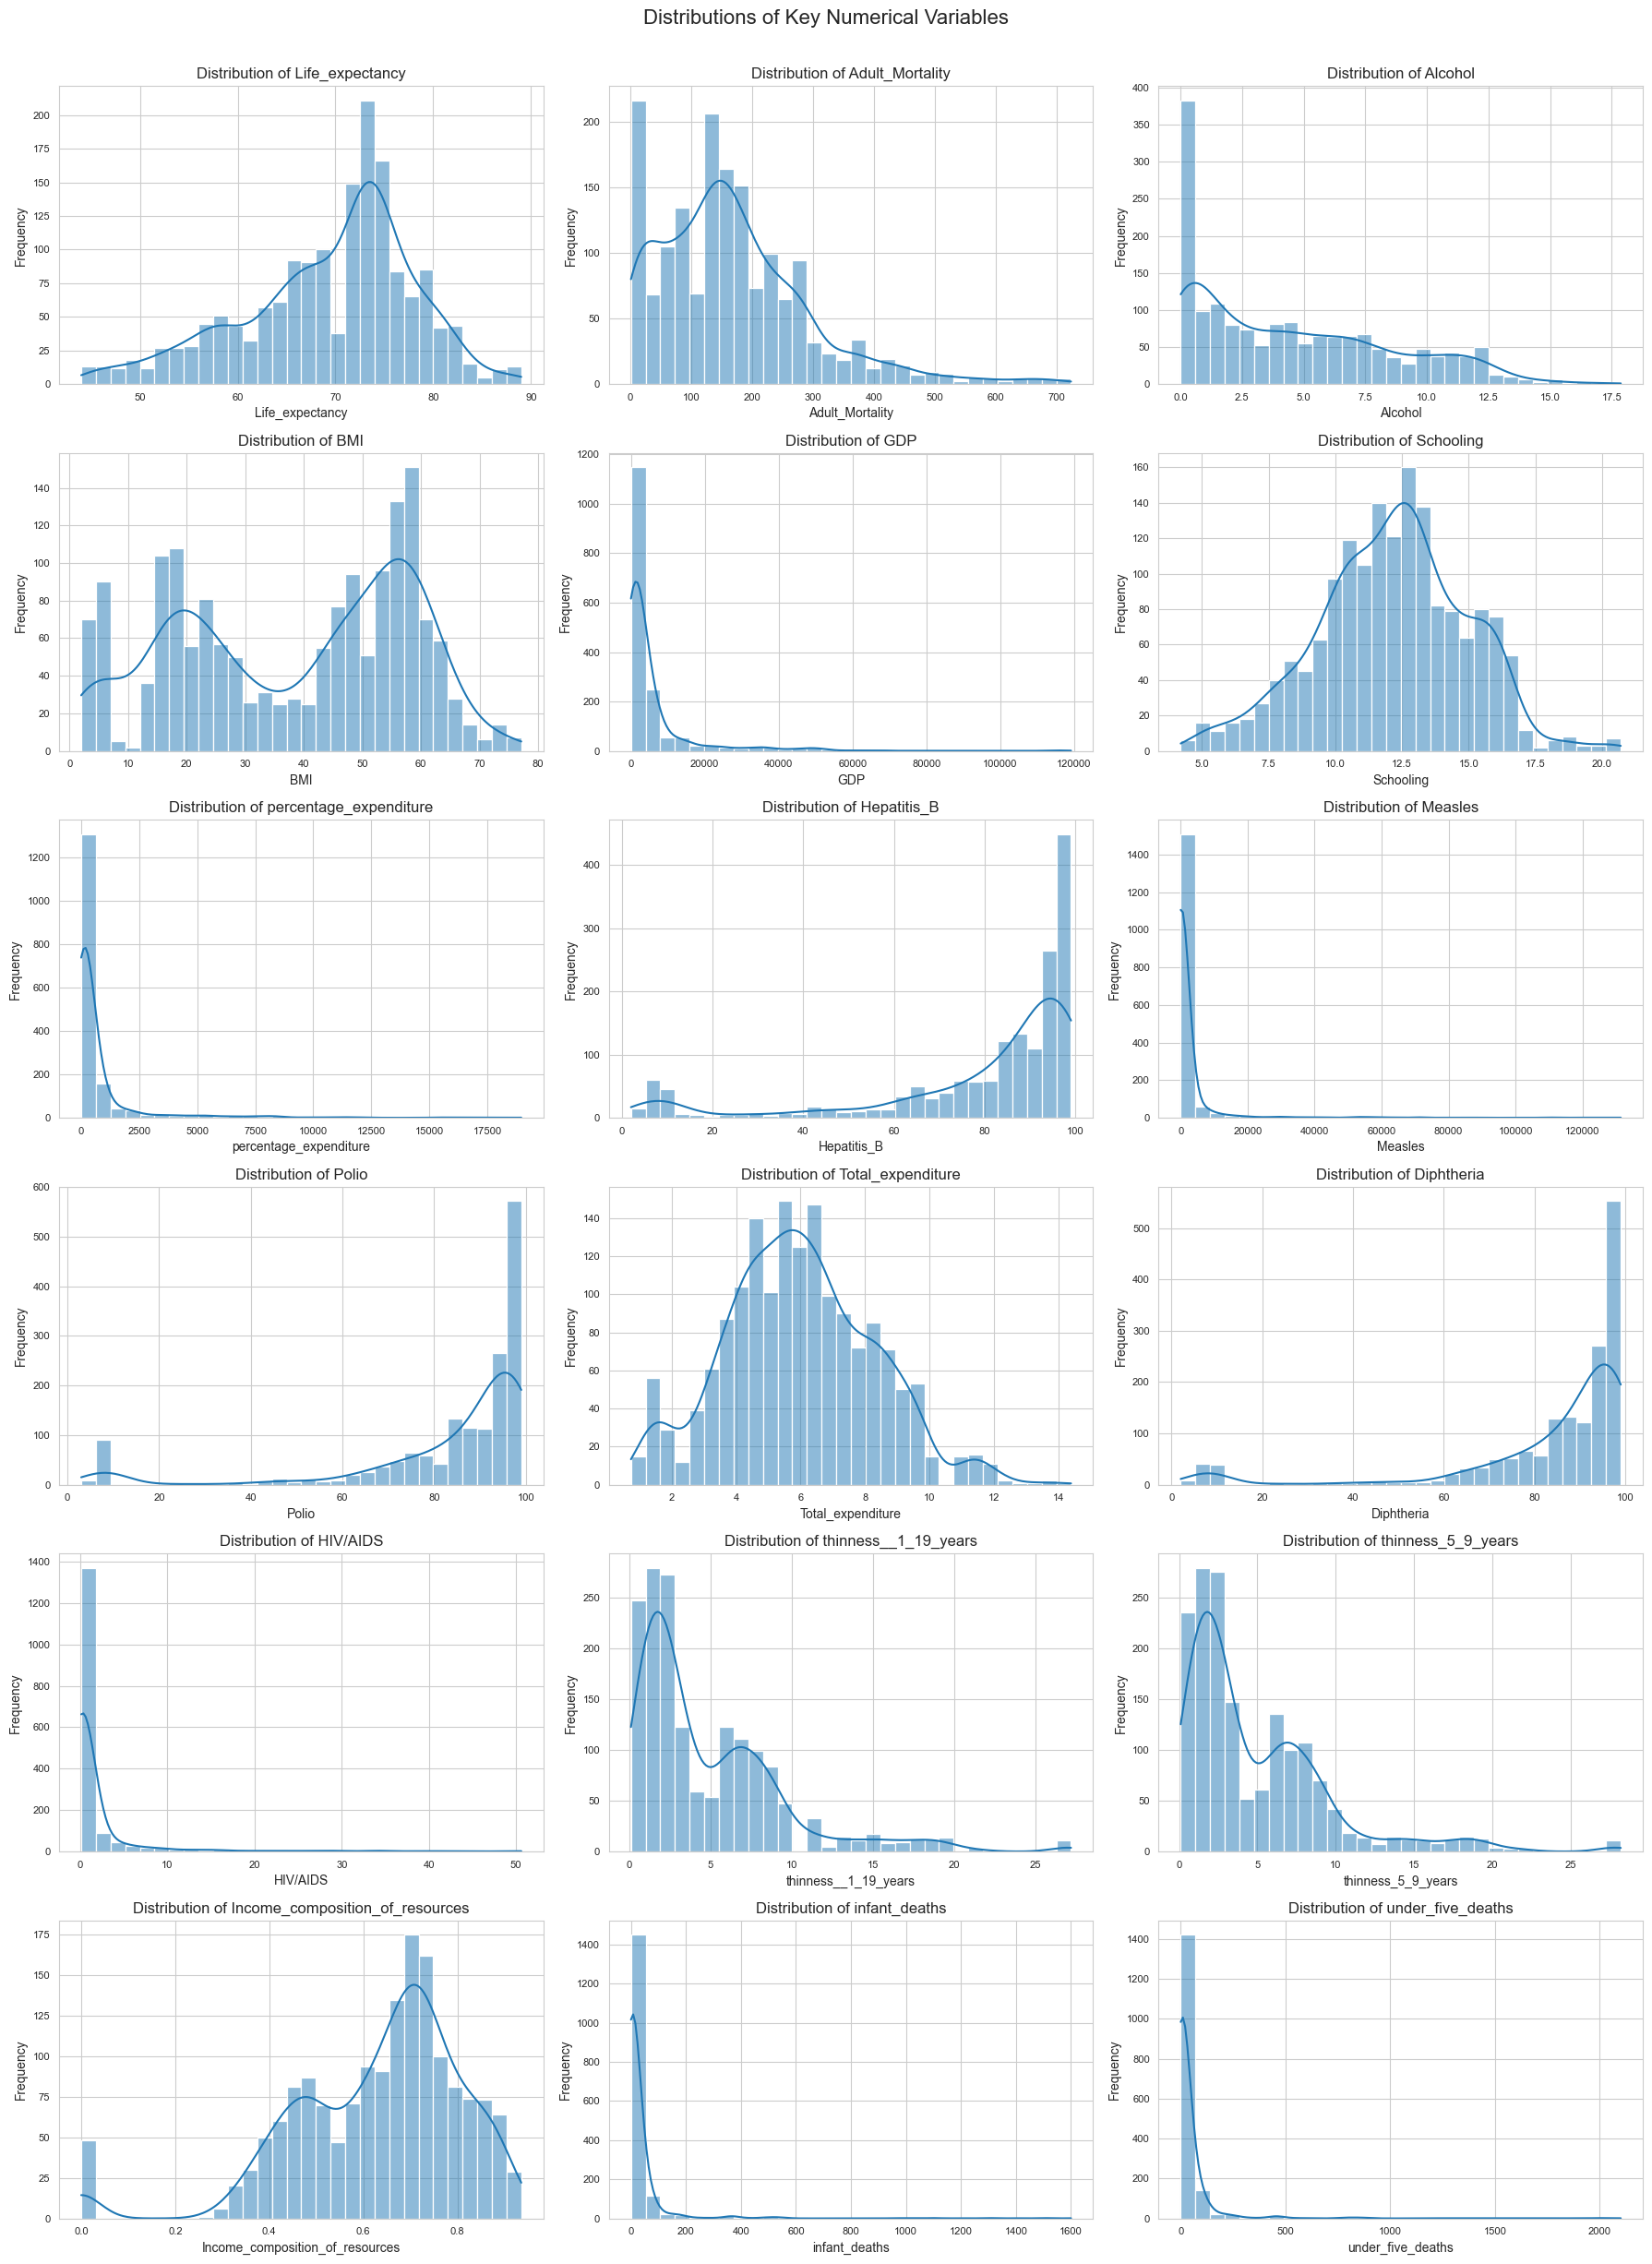

In [70]:
# NUMERICAL DATA VISUALIZATION
# Updating the numerical_cols list based on the new, clean column names
numerical_cols = [
    'Life_expectancy', 'Adult_Mortality', 'Alcohol', 'BMI', 'GDP', 'Schooling',
    'percentage_expenditure', 'Hepatitis_B', 'Measles', 'Polio', 'Total_expenditure',
    'Diphtheria', 'HIV/AIDS',
    'thinness__1_19_years', 'thinness_5_9_years',
    'Income_composition_of_resources', 'infant_deaths', 'under_five_deaths'
]

# Setting style for plots
sns.set_style("whitegrid")

# Creating histograms for key numerical variables
# Setting up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten() # Flattening the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(new_data_set[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Removing any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Key Numerical Variables', y=1.02, fontsize=16)
plt.savefig('numerical_distributions_cleaned.png')
plt.show()

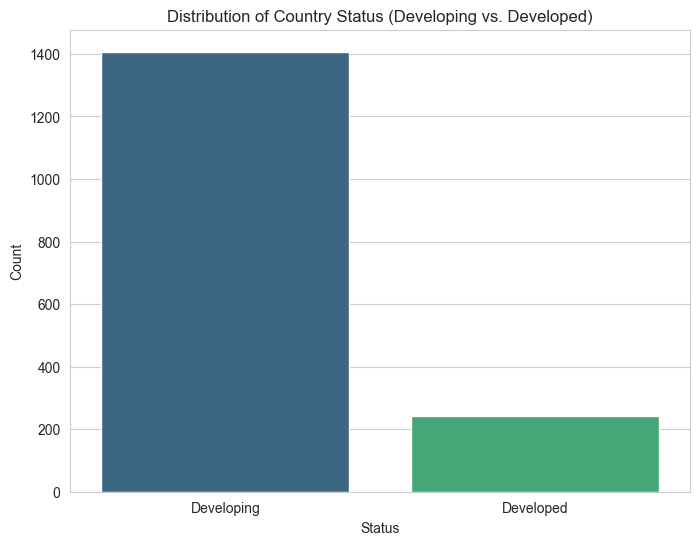

In [71]:
# CATEGORICAL DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring column names are stripped
df.columns = df.columns.str.strip()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a bar plot for the 'Status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', hue='Status', data=df, palette='viridis')
plt.title('Distribution of Country Status (Developing vs. Developed)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.savefig('status_distribution.png')
plt.show() 

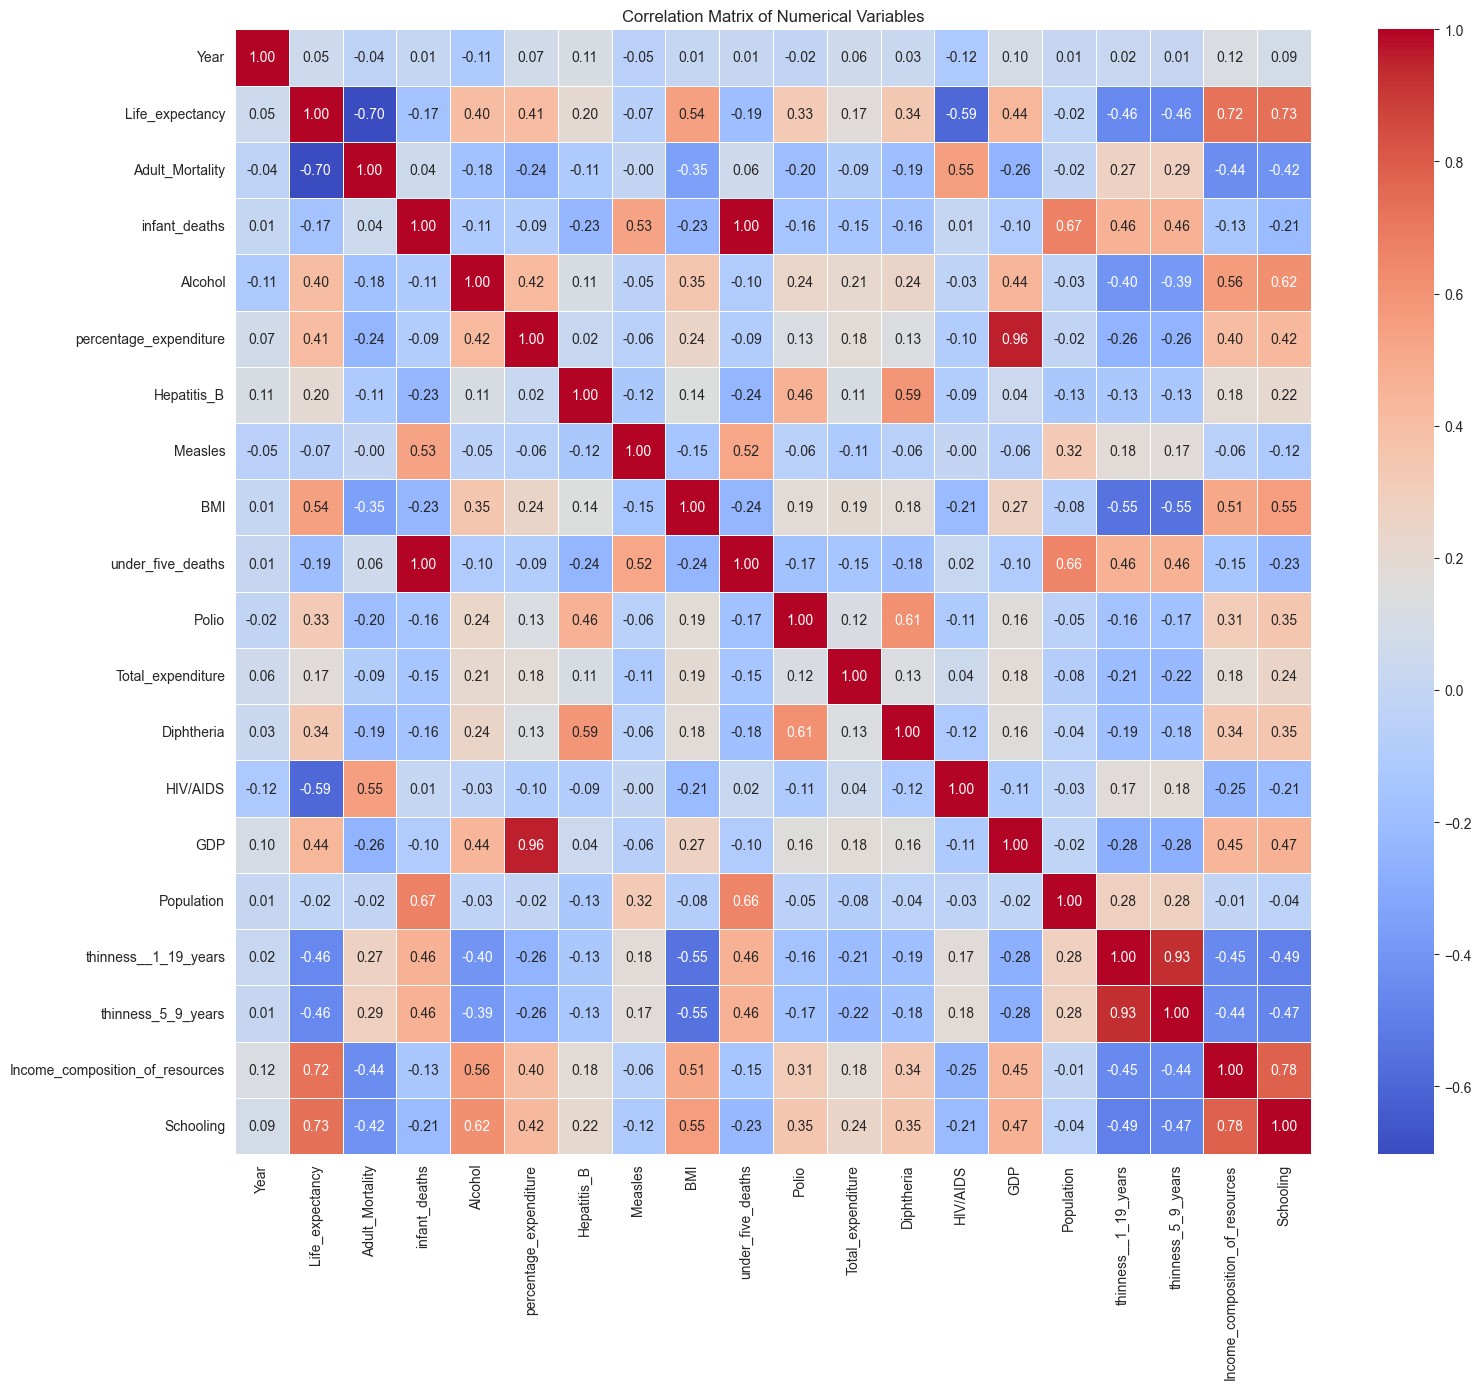

In [72]:
# CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring column names are stripped
df.columns = df.columns.str.strip()

# Calculating the correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

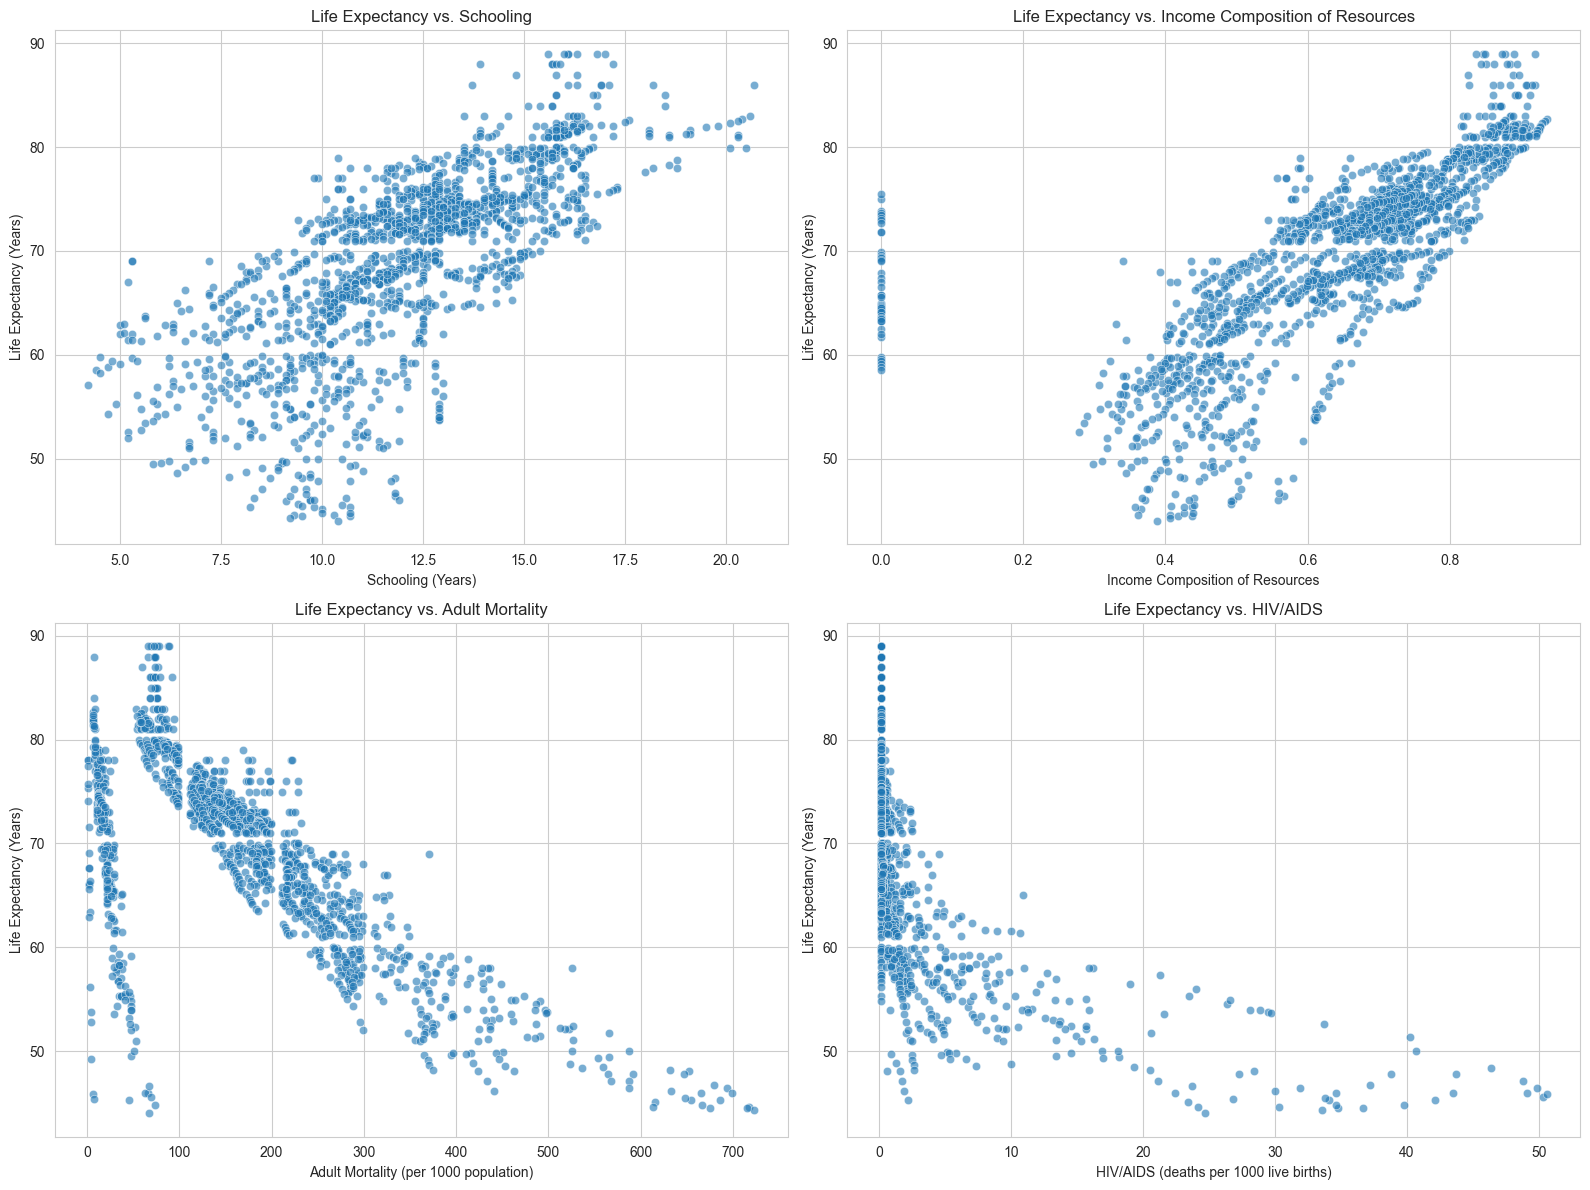

In [73]:
# VISUALIZING KEY RELATIONSHIPS
# scatter plots for key relationships with 'Life Expectancy'
import matplotlib.pyplot as plt
import seaborn as sns

# EnsurING column names are stripped
df.columns = df.columns.str.strip()

# Setting the whitegrid style of the plots
sns.set_style("whitegrid")

# Creating scatter plots for key relationships with 'Life expectancy'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Variables with strong positive correlation with Life Expectancy
sns.scatterplot(x='Schooling', y='Life_expectancy', data=df, ax=axes[0], alpha=0.6)
axes[0].set_title('Life Expectancy vs. Schooling')
axes[0].set_xlabel('Schooling (Years)')
axes[0].set_ylabel('Life Expectancy (Years)')

sns.scatterplot(x='Income_composition_of_resources', y='Life_expectancy', data=df, ax=axes[1], alpha=0.6)
axes[1].set_title('Life Expectancy vs. Income Composition of Resources')
axes[1].set_xlabel('Income Composition of Resources')
axes[1].set_ylabel('Life Expectancy (Years)')

# Variables with strong negative correlation with Life Expectancy
sns.scatterplot(x='Adult_Mortality', y='Life_expectancy', data=df, ax=axes[2], alpha=0.6)
axes[2].set_title('Life Expectancy vs. Adult Mortality')
axes[2].set_xlabel('Adult Mortality (per 1000 population)')
axes[2].set_ylabel('Life Expectancy (Years)')

sns.scatterplot(x='HIV/AIDS', y='Life_expectancy', data=df, ax=axes[3], alpha=0.6)
axes[3].set_title('Life Expectancy vs. HIV/AIDS')
axes[3].set_xlabel('HIV/AIDS (deaths per 1000 live births)')
axes[3].set_ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.savefig('key_relationships_scatterplots.png')
plt.show() 

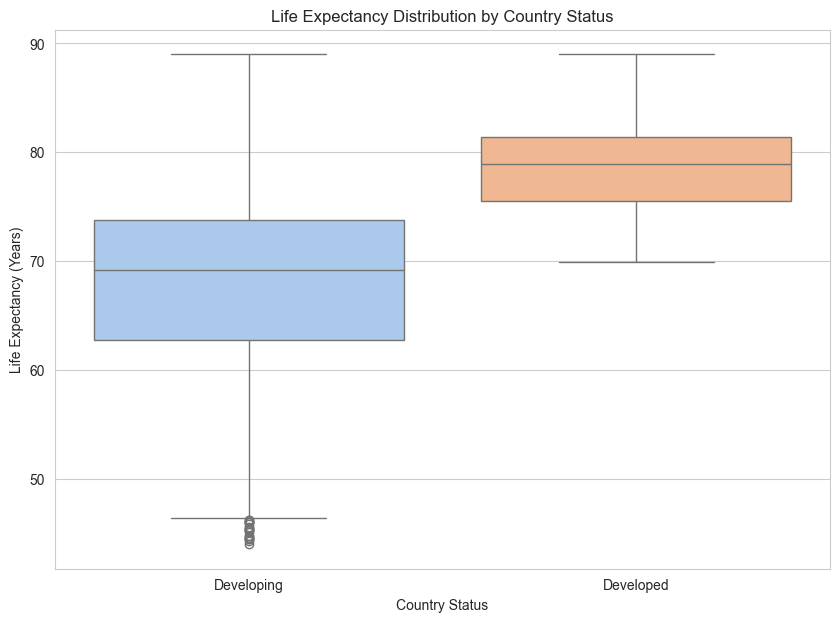

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# box plot comparing 'Life expectancy' between 'Developing' and 'Developed' countries

sns.set_style("whitegrid")

# Creating a box plot to compare Life expectancy by Status
plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Life_expectancy', data=df, hue='Status', palette='pastel', legend=False)
plt.title('Life Expectancy Distribution by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy (Years)')
plt.savefig('life_expectancy_by_status_boxplot.png')
plt.show() 

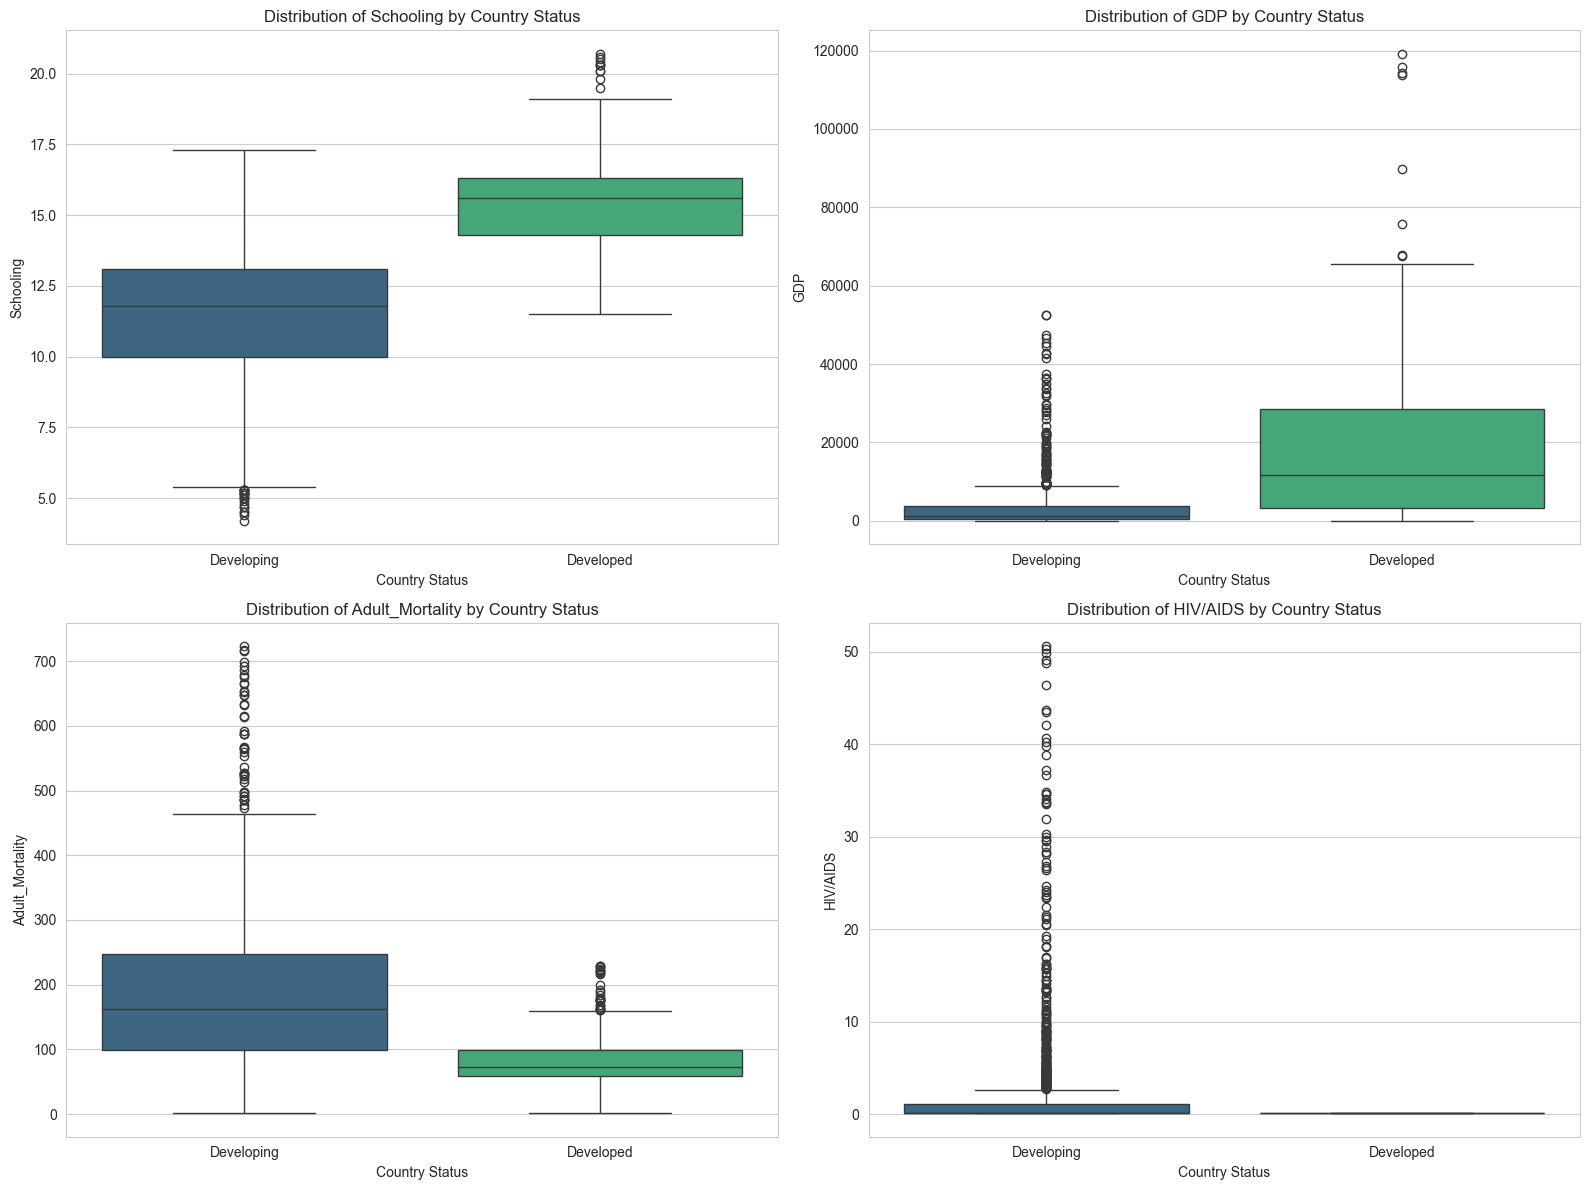

In [75]:
# Key Indicators Distribution by Country Status
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring column names are stripped
df.columns = df.columns.str.strip()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure with subplots for comparison of key indicators by Status
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Listing of key indicators to compare by Status
key_indicators = ['Schooling', 'GDP', 'Adult_Mortality', 'HIV/AIDS']

#box plots for each key indicator
for i, col in enumerate(key_indicators):
    # sns.boxplot(x='Status', y=col, data=df, ax=axes[i], palette='viridis')
    sns.boxplot(x='Status', y=col, data=df, ax=axes[i], hue='Status', palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {col} by Country Status')
    axes[i].set_xlabel('Country Status')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig('key_indicators_by_status_boxplots.png')
plt.show() 

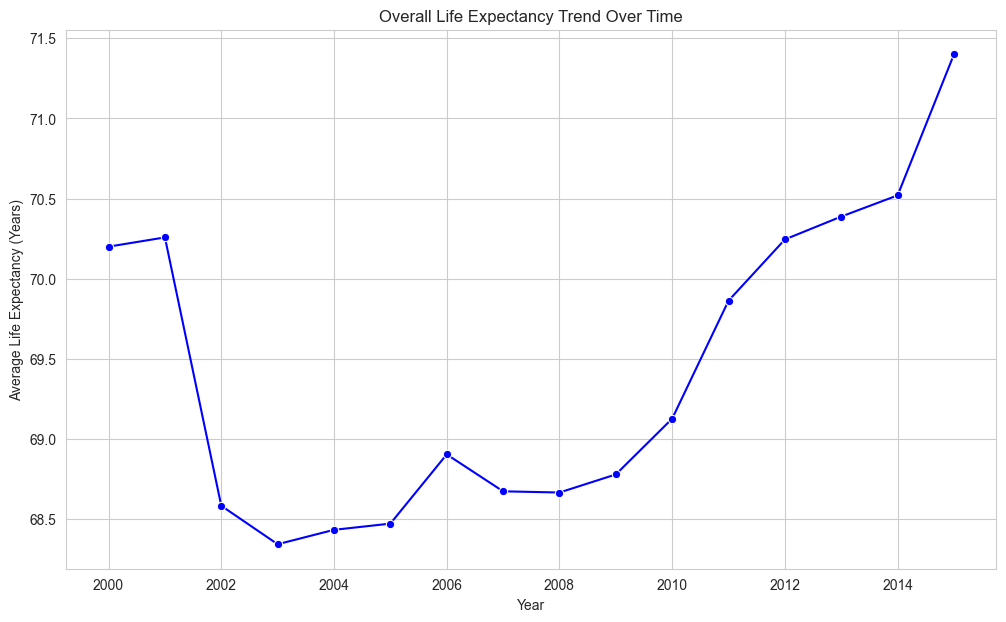

In [76]:
# Overall Life Expectancy Trend Over Time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df.columns = df.columns.str.strip()

# Calculating average Life expectancy per Year
life_expectancy_yearly = df.groupby('Year')['Life_expectancy'].mean().reset_index()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting overall Life Expectancy trend over time
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life_expectancy', data=life_expectancy_yearly, marker='o', color='blue')
plt.title('Overall Life Expectancy Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('overall_life_expectancy_trend.png')
plt.show()

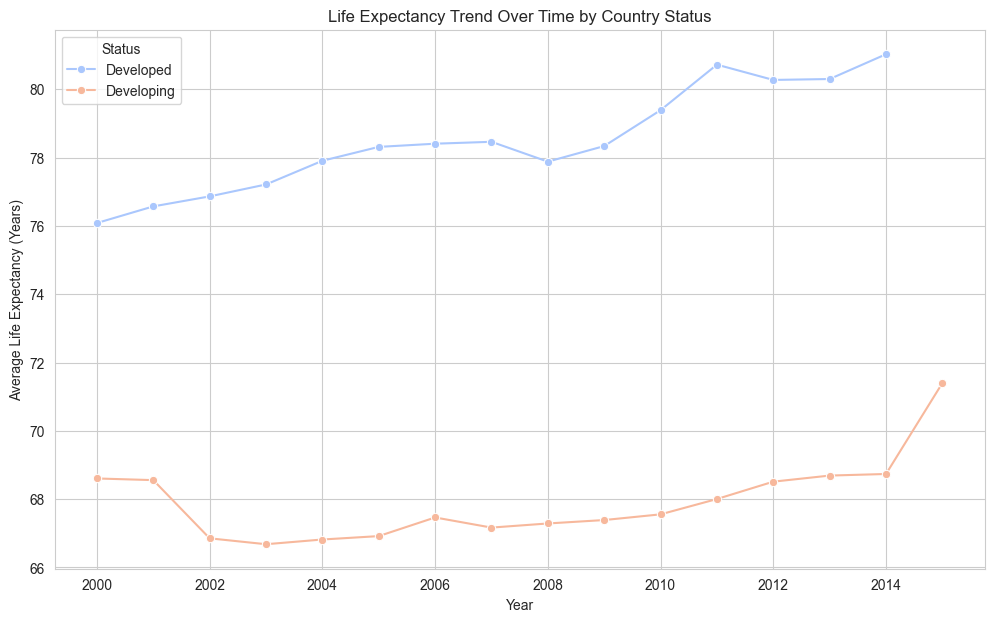

In [77]:
#  Life Expectancy Trend Over Time by Country Status
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensuring column names are stripped
df.columns = df.columns.str.strip()

# Calculating average Life expectancy per Year by Status
life_expectancy_yearly_status = df.groupby(['Year', 'Status'])['Life_expectancy'].mean().reset_index()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting Life Expectancy trend over time by Status
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life_expectancy', hue='Status', data=life_expectancy_yearly_status, marker='o', palette='coolwarm')
plt.title('Life Expectancy Trend Over Time by Country Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('life_expectancy_trend_by_status.png')
plt.show()

In [87]:
import numpy as np
import re
import pandas as pd

# List of numerical columns to apply capping (outlier analysis)
cols_to_cap = [
    'Adult_Mortality', 'infant_deaths', 'Measles', 'HIV/AIDS', 'GDP', 'Population',
    'percentage_expenditure', 'Alcohol', 'thinness__1_19_years', 'thinness_5_9_years',
    'Total_expenditure', 'Diphtheria', 'Polio', 'Hepatitis_B'
]

# Function to apply IQR-based capping
def cap_outliers_iqr(df_in, column):
    # Create a copy to avoid SettingWithCopyWarning
    df_temp = df_in.copy()
    Q1 = df_temp[column].quantile(0.25)
    Q3 = df_temp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_temp[column] = np.where(df_temp[column] < lower_bound, lower_bound, df_temp[column])
    df_temp[column] = np.where(df_temp[column] > upper_bound, upper_bound, df_temp[column])
    return df_temp

# Apply capping to selected columns
print("Applying IQR-based capping to columns")
for col in cols_to_cap:
    df = cap_outliers_iqr(df, col) 

print("\nDescriptive statistics of columns after re-applying capping (shows current state):")
print(df[cols_to_cap].describe().to_markdown(numalign="left", stralign="left"))

Applying IQR-based capping to columns

Descriptive statistics of columns after re-applying capping (shows current state):
|       | Adult_Mortality   | infant_deaths   | Measles   | HIV/AIDS   | GDP     | Population   | percentage_expenditure   | Alcohol   | thinness__1_19_years   | thinness_5_9_years   | Total_expenditure   | Diphtheria   | Polio   | Hepatitis_B   |
|:------|:------------------|:----------------|:----------|:-----------|:--------|:-------------|:-------------------------|:----------|:-----------------------|:---------------------|:--------------------|:-------------|:--------|:--------------|
| count | 1649              | 1649            | 1649      | 1649       | 1649    | 1649         | 1649                     | 1649      | 1649                   | 1649                 | 1649                | 1649         | 1649    | 1649          |
| mean  | 164.469           | 13.7668         | 240.046   | 0.483445   | 3301.76 | 5.12059e+06  | 338.703                  | 4.53264  

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import re

# Creating a copy of the DataFrame to prepare baseline features
df_baseline_prep = new_data_set.copy() 

# Defining target variable
y_baseline = df_baseline_prep['Life_expectancy']

# Defining features (X_baseline) by dropping only the target variable

X_baseline = df_baseline_prep.drop('Life_expectancy', axis=1)

# Handling categorical 'Status' and 'Country' columns using One-Hot Encoding for baseline
X_baseline['Status'] = X_baseline['Status'].astype('category')
X_baseline = pd.get_dummies(X_baseline, columns=['Status'], drop_first=True, dtype=int)

X_baseline['Country'] = X_baseline['Country'].astype('category')
X_baseline = pd.get_dummies(X_baseline, columns=['Country'], drop_first=True, dtype=int)


# Identifing numerical columns for scaling in the baseline model
numerical_cols_to_scale_baseline = X_baseline.select_dtypes(include=['float64', 'int64']).columns.tolist()

#listing columns to exclude from scaling.
cols_to_exclude_from_scaling_baseline = [col for col in X_baseline.columns if col.startswith('Status_') or col.startswith('Country_')]
numerical_cols_to_scale_baseline = [col for col in numerical_cols_to_scale_baseline if col not in cols_to_exclude_from_scaling_baseline]


# Applying StandardScaler to the identified numerical columns for baseline
scaler_baseline = StandardScaler()
X_baseline[numerical_cols_to_scale_baseline] = scaler_baseline.fit_transform(X_baseline[numerical_cols_to_scale_baseline])


# Splitting the baseline data
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42
)

print("Training Baseline Model (Without Engineered Features) ---")
model_baseline = RandomForestRegressor(n_estimators=100, random_state=42) # Using same n_estimators for fair comparison
model_baseline.fit(X_train_baseline, y_train_baseline)
print("Baseline Model training complete.")



Training Baseline Model (Without Engineered Features) ---
Baseline Model training complete.


In [89]:
# Evaluating the baseline model
y_pred_baseline = model_baseline.predict(X_test_baseline)

mae_baseline = mean_absolute_error(y_test_baseline, y_pred_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)

print("\n--- Baseline Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_baseline:.2f}")
print(f"Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_baseline:.2f}")
print(f"R-squared (R2): {r2_baseline:.2f}")


--- Baseline Model Performance ---
Mean Absolute Error (MAE): 1.11
Mean Squared Error (MSE): 3.61
Root Mean Squared Error (RMSE): 1.90
R-squared (R2): 0.95


In [90]:
#FEATURE ENGINEERING

# Creating 'Health_Expenditure_Per_Capita'
# Handling potential division by zero or very small population values
new_data_set['Health_Expenditure_Per_Capita'] = new_data_set.apply(
    lambda row: row['Total_expenditure'] / row['Population'] if row['Population'] != 0 else 0,
    axis=1
)

# Creating 'Schooling_Income_Interaction'
new_data_set['Schooling_Income_Interaction'] = new_data_set['Schooling'] * new_data_set['Income_composition_of_resources']

# Displaying the first few rows with the new features
print("\nDataFrame with new engineered features:")
print(new_data_set[['Country', 'Year', 'Total_expenditure', 'Population', 'Health_Expenditure_Per_Capita',
          'Schooling', 'Income_composition_of_resources', 'Schooling_Income_Interaction']].head().to_markdown(index=False, numalign="left", stralign="left"))

# Checking for any new missing values introduced
print("\nMissing values after feature engineering:")
print(new_data_set[['Health_Expenditure_Per_Capita', 'Schooling_Income_Interaction']].isnull().sum().to_markdown(numalign="left", stralign="left"))


DataFrame with new engineered features:
| Country     | Year   | Total_expenditure   | Population   | Health_Expenditure_Per_Capita   | Schooling   | Income_composition_of_resources   | Schooling_Income_Interaction   |
|:------------|:-------|:--------------------|:-------------|:--------------------------------|:------------|:----------------------------------|:-------------------------------|
| Afghanistan | 2015   | 8.16                | 3.37365e+07  | 2.41875e-07                     | 10.1        | 0.479                             | 4.8379                         |
| Afghanistan | 2014   | 8.18                | 327582       | 2.49708e-05                     | 10          | 0.476                             | 4.76                           |
| Afghanistan | 2013   | 8.13                | 3.17317e+07  | 2.56211e-07                     | 9.9         | 0.47                              | 4.653                          |
| Afghanistan | 2012   | 8.52                | 3.69696e+06  | 2.

Plots for new engineered features


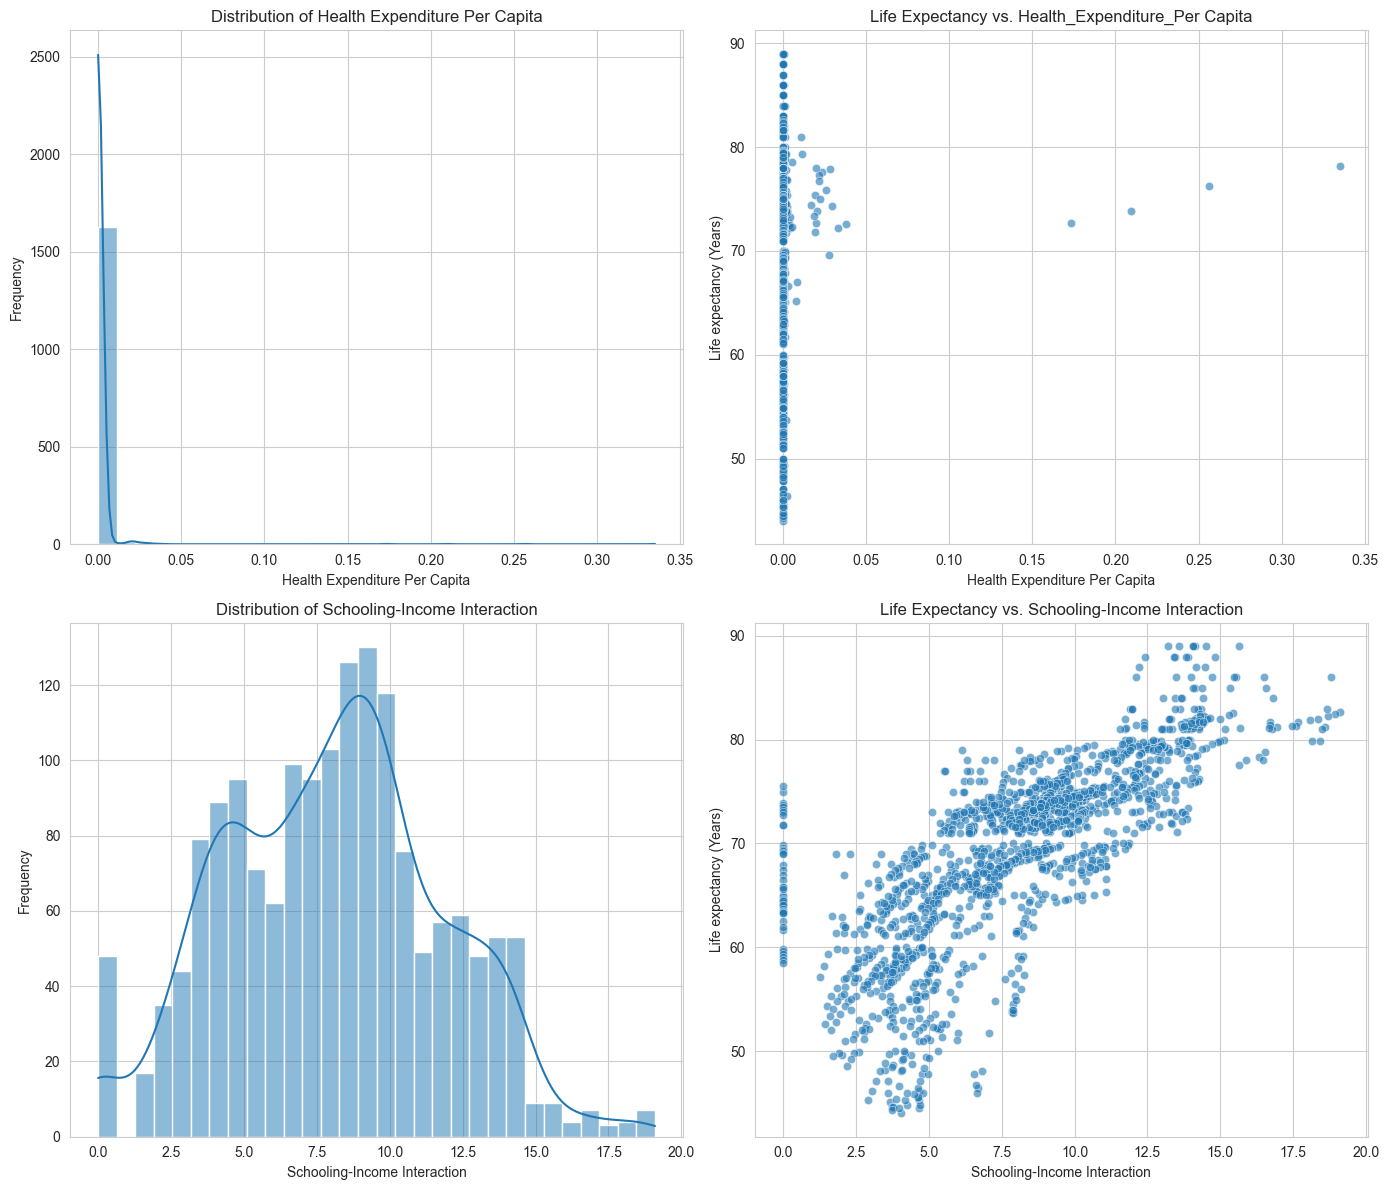

In [93]:
#PLOTTING THE NEW FEATURES
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Histogram for Health_Expenditure_Per_Capita
sns.histplot(new_data_set['Health_Expenditure_Per_Capita'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Health Expenditure Per Capita')
axes[0].set_xlabel('Health Expenditure Per Capita')
axes[0].set_ylabel('Frequency')

# Scatter plot for Health_Expenditure_Per_Capita vs. Life expectancy
sns.scatterplot(x='Health_Expenditure_Per_Capita', y='Life_expectancy', data=new_data_set, ax=axes[1], alpha=0.6)
axes[1].set_title('Life Expectancy vs. Health_Expenditure_Per Capita')
axes[1].set_xlabel('Health Expenditure Per Capita')
axes[1].set_ylabel('Life expectancy (Years)')

# Histogram for Schooling_Income_Interaction
sns.histplot(new_data_set['Schooling_Income_Interaction'], kde=True, ax=axes[2], bins=30)
axes[2].set_title('Distribution of Schooling-Income Interaction')
axes[2].set_xlabel('Schooling-Income Interaction')
axes[2].set_ylabel('Frequency')

# Scatter plot for Schooling_Income_Interaction vs. Life expectancy
sns.scatterplot(x='Schooling_Income_Interaction', y='Life_expectancy', data=new_data_set, ax=axes[3], alpha=0.6)
axes[3].set_title('Life Expectancy vs. Schooling-Income Interaction')
axes[3].set_xlabel('Schooling-Income Interaction')
axes[3].set_ylabel('Life expectancy (Years)')

plt.tight_layout()
plt.savefig('new_features_plots.png')

print("Plots for new engineered features")

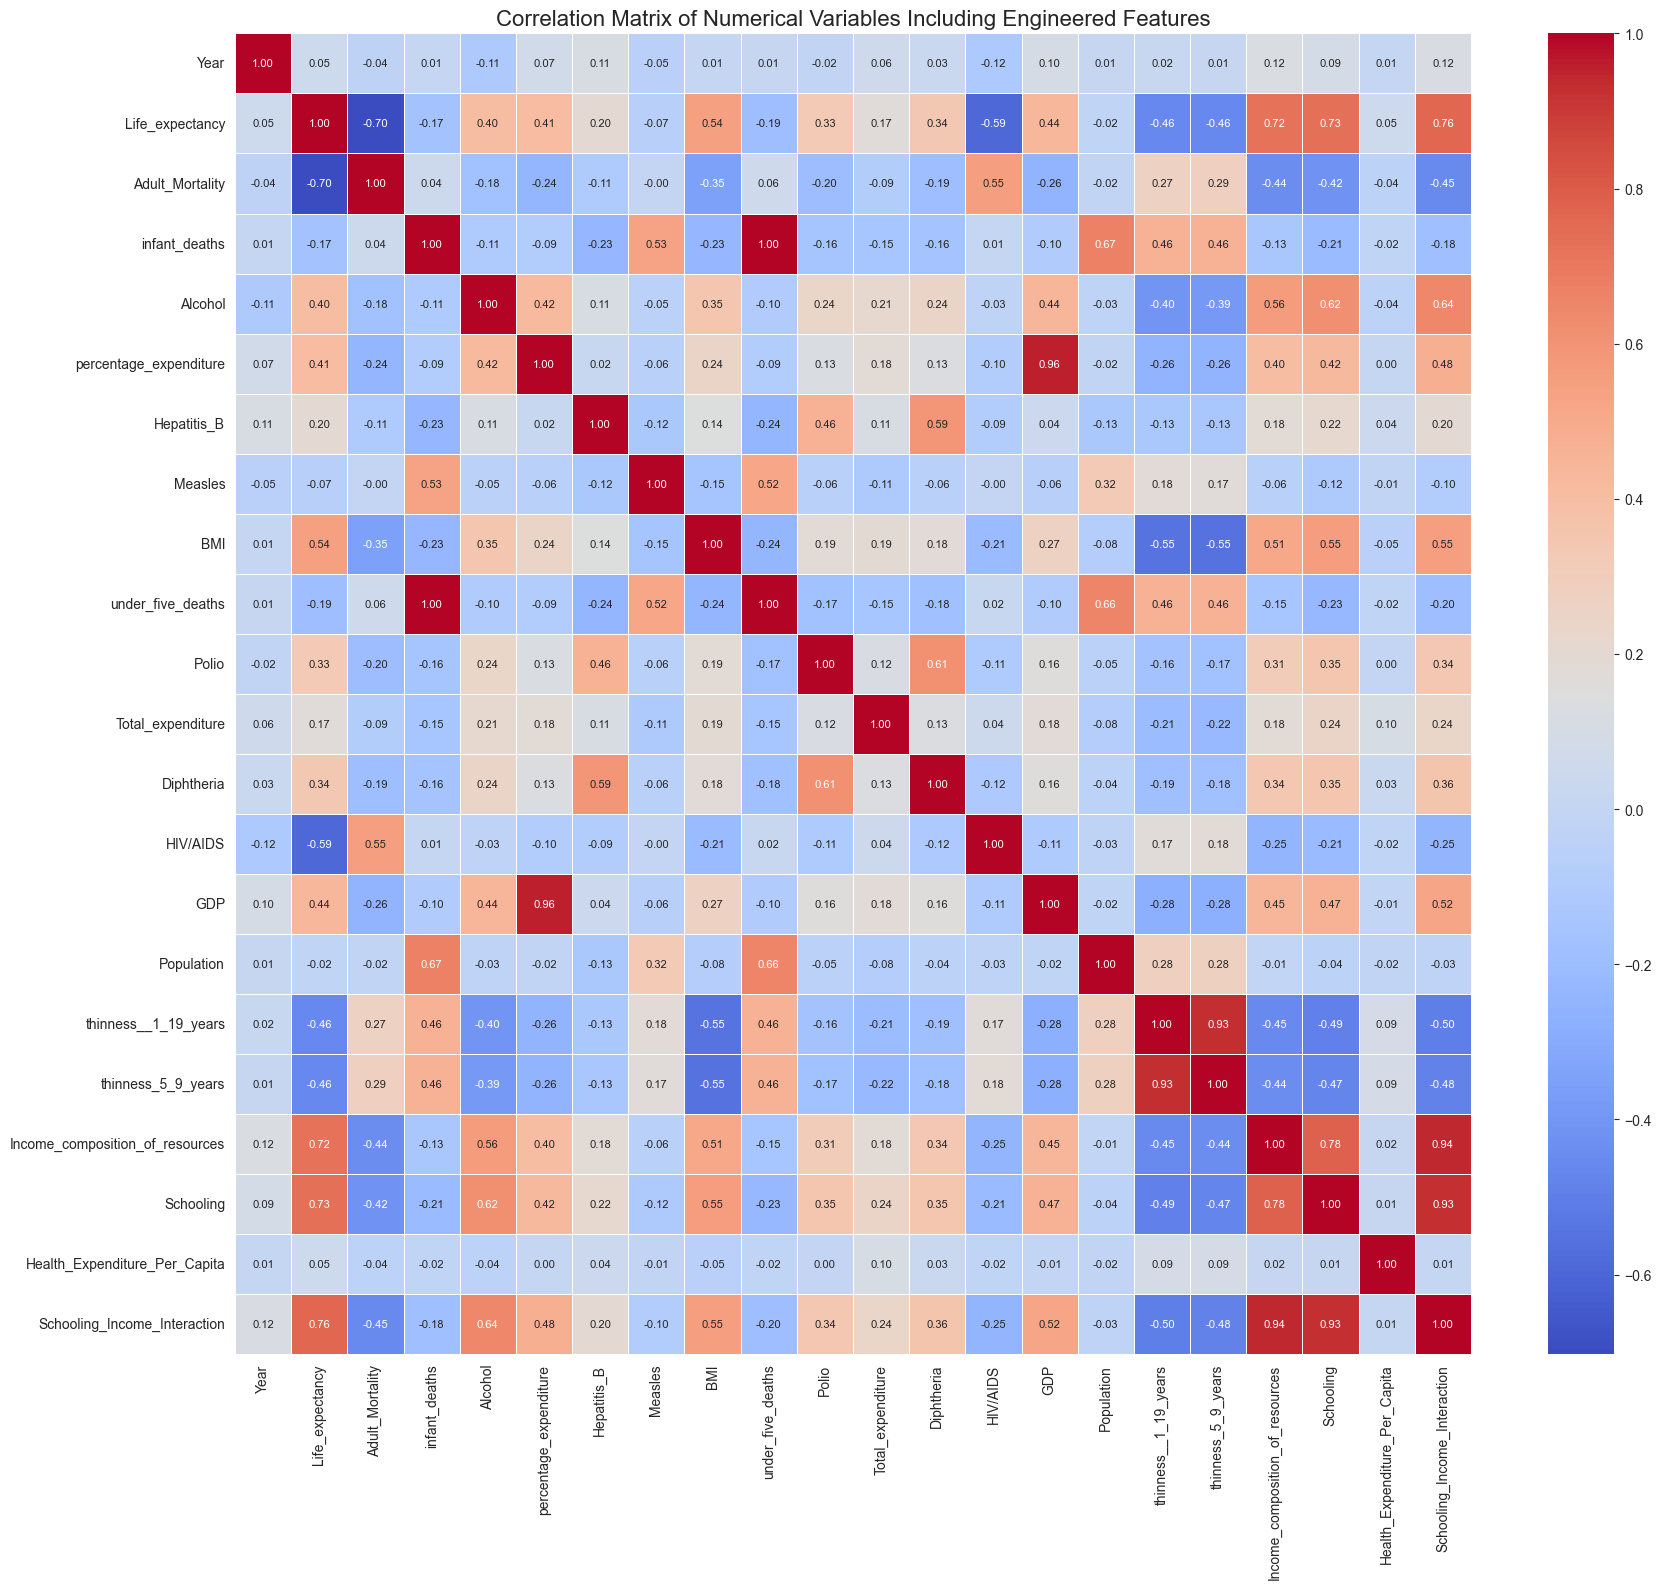

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

df = new_data_set

# Ensuring all column names are stripped of any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Selecting only numerical columns to calculate the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(18, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Variables Including Engineered Features', fontsize=16)
plt.xticks(rotation=90, fontsize=10) # Rotating x-axis labels for better readability
plt.yticks(rotation=0, fontsize=10)  # Ensuring y-axis labels are horizontal
plt.tight_layout() # Adjusting layout to prevent labels from overlapping
plt.show()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

new_data_set.columns = [re.sub(r'\s+', ' ', col).strip() for col in new_data_set.columns]

# Defining features (X) and target (y)
y = new_data_set['Life_expectancy']

X = new_data_set.drop(['Life_expectancy'], axis=1)

# Handling 'Status' and 'Country' categorical variables using One-Hot Encoding
X['Status'] = X['Status'].astype('category')
X = pd.get_dummies(X, columns=['Status'], drop_first=True, dtype=int)

X['Country'] = X['Country'].astype('category')
X = pd.get_dummies(X, columns=['Country'], drop_first=True, dtype=int)


# Identifing numerical columns for scaling
numerical_cols_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_to_exclude_from_scaling = [col for col in X.columns if col.startswith('Status_') or col.startswith('Country_')]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in cols_to_exclude_from_scaling]


# Applying StandardScaler to the identified numerical columns
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



Data splitting.
X_train shape: (1319, 154)
X_test shape: (330, 154)
y_train shape: (1319,)
y_test shape: (330,)


In [95]:
# Model Training
print("Training Random Forest Regressor model with Engineered Features...")
model_engineered = RandomForestRegressor(n_estimators=100, random_state=42) 
model_engineered.fit(X_train, y_train)
print("Model training complete.")


Training Random Forest Regressor model with Engineered Features...
Model training complete.


In [96]:
# Model Evaluation 
print("\nEvaluating model performance for Engineered Features Model...")
y_pred_engineered = model_engineered.predict(X_test)

mae_engineered = mean_absolute_error(y_test, y_pred_engineered) 
mse_engineered = mean_squared_error(y_test, y_pred_engineered) 
rmse_engineered = np.sqrt(mse_engineered) 
r2_engineered = r2_score(y_test, y_pred_engineered) 

print(f"Mean Absolute Error (MAE): {mae_engineered:.2f}")
print(f"Mean Squared Error (MSE): {mse_engineered:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_engineered:.2f}")
print(f"R-squared (R2): {r2_engineered:.2f}")


Evaluating model performance for Engineered Features Model...
Mean Absolute Error (MAE): 1.11
Mean Squared Error (MSE): 3.61
Root Mean Squared Error (RMSE): 1.90
R-squared (R2): 0.95


In [97]:
 # Comparison of Model Performance
print("\n--- Performance Comparison Summary ---")
print("Metric         | Baseline Model | Engineered Features Model")
print("-------------------------------------------------------")
print(f"MAE            | {mae_baseline:.2f}          | {mae_engineered:.2f}")
print(f"MSE            | {mse_baseline:.2f}          | {mse_engineered:.2f}")
print(f"RMSE           | {rmse_baseline:.2f}          | {rmse_engineered:.2f}")
print(f"R2             | {r2_baseline:.2f}          | {r2_engineered:.2f}")

#Conclusion based on the comparison
print("\nConclusion on Impact of Engineered Features:")
if r2_engineered > r2_baseline:
    print(f"The R-squared score improved from {r2_baseline:.2f} to {r2_engineered:.2f}, indicating that the engineered features (along with keeping Country) improved the model's ability to explain the variance in life expectancy.")
    print("This suggests that 'Health_Expenditure_Per_Capita' and 'Schooling_Income_Interaction' provide valuable information to the model.")
elif r2_engineered < r2_baseline:
    print(f"The R-squared score changed from {r2_baseline:.2f} to {r2_engineered:.2f}, indicating that the engineered features did not improve (or slightly decreased) the model's performance in explaining the variance in life expectancy.")
    print("This might suggest these specific engineered features do not add significant predictive power, or further tuning/different features could be explored.")
else:
    print(f"The R-squared score remained the same at {r2_engineered:.2f}, indicating that the engineered features had no significant impact on model performance.")


--- Performance Comparison Summary ---
Metric         | Baseline Model | Engineered Features Model
-------------------------------------------------------
MAE            | 1.11          | 1.11
MSE            | 3.61          | 3.61
RMSE           | 1.90          | 1.90
R2             | 0.95          | 0.95

Conclusion on Impact of Engineered Features:
The R-squared score remained the same at 0.95, indicating that the engineered features had no significant impact on model performance.
